In [2]:
%matplotlib inline
import george
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
from mpl_toolkits.mplot3d import Axes3D

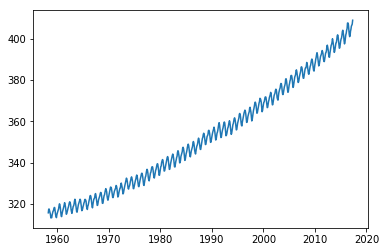

In [3]:
t,c = np.loadtxt("co2.txt", unpack=True)
plt.plot(t,c)

134.82514123


/home/tmcclintock/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


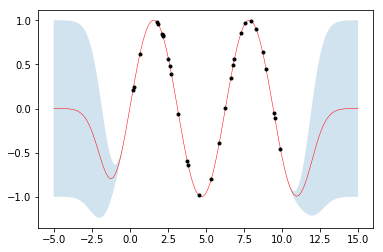

In [7]:
x = 10 * np.sort(np.random.rand(30))
yerr = 0.2 * np.ones_like(x)*1e-8
y = np.sin(x) + yerr * np.random.randn(len(x))
kernel = george.kernels.ExpSquaredKernel(1.0)
#kernel = george.kernels.CosineKernel(2*np.pi)
gp = george.GP(kernel)
gp.compute(x, yerr)
print gp.lnlikelihood(y)
d = np.linspace(-5, 15, 500)
mu, cov = gp.predict(y, d)
std = np.sqrt(np.diag(cov))
plt.errorbar(x, y, yerr, marker='.', ls='', c='k')
plt.plot(d, mu, color='red', linewidth=0.5)
plt.fill_between(d, mu-std, mu+std, alpha=0.2)

(50, 50)


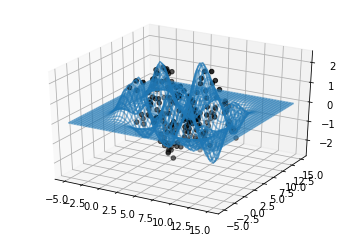

In [4]:
N = 200
x = np.vstack((10*np.random.rand(N),10*np.random.rand(N)))
yerr = 0.2 * np.ones(N)
y = np.sin(x[0]) + np.cos(x[1]) + yerr*np.random.randn(N)
#NOTE: the cosine kernel only works in one dimension right now...
#kernel = george.kernels.CosineKernel(2*np.pi, ndim=2)
kernel = george.kernels.ExpSquaredKernel(1.0, ndim=2)
gp = george.GP(kernel)
gp.compute(x.T, yerr)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y, c='k')

Nd = 50
X0 = np.linspace(np.min(x)-5, np.max(x)+5, Nd)
X1 = np.linspace(np.min(x)-5, np.max(x)+5, Nd)
D0, D1 = np.meshgrid(X0, X1)
X = np.array([D0.flatten(), D1.flatten()])
mu = np.ones_like(D0)
for i in range(len(X0)):
    for j in range(len(X1)):
        Xij = np.atleast_2d([X0[i], X1[j]])
        muij, cov = gp.predict(y,Xij)
        mu[i,j] = muij
print mu.shape
ax.plot_wireframe(D0, D1, mu, alpha=0.5)
fig.savefig("ex2d.png")